In [6]:
import os
import cv2
import numpy as np
from sklearn.feature_extraction import image as sklearn_image
import pickle
import matplotlib.pyplot as plt
from scipy import misc
from scipy import ndimage
%matplotlib inline

In [126]:
def read_image(img_path, size=None):
    img = cv2.imread(img_path, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if size:
        assert isinstance(size, tuple), "Size is not in tuple"
        return misc.imresize(img, size)
    return img


def read_label(mask_path, binary=False, size=None):
    img = ndimage.imread(mask_path, mode='L')
    if size:
        assert isinstance(size, tuple), "Size is not in tuple"
        img = misc.imresize(img, size)
    if binary:
        img[img <= 127] = 1
        img[img > 127] = 0
        return img
    return img

def display(img):
    plt.imshow(img,cmap="Greys")
    plt.show()

def extract_patches_2d(image, bounding_box, label, patch_size=(224, 224), max_patches=1):
    x, y, w, h = bounding_box
                                                                                                             
    rand_x, rand_y, w, h = np.random.randint(low=x, high=x+w , size=1)[0], np.random.randint(low=y, high=y+h,size=1)[0], patch_size[0], patch_size[1]
    label_image = label[rand_y:rand_y + h, rand_x:rand_x + w]
    intersection = np.count_nonzero(label_image) * 1.0 / (np.count_nonzero(label_image) + len(np.where(label_image==0)))
    #return label_image,intersection
    return image[rand_y:rand_y + h, rand_x:rand_x + w, :], intersection

def extract_random_patch_from_contour(image, label, patch_size, max_patches, cancer_ratio):
    _, contours, _ = cv2.findContours(label, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    bounding_boxes = [cv2.boundingRect(c) for c in contours]
    #print bounding_boxes
    images = []
    counter = 0
    while counter < max_patches:
        index = np.random.randint(0, len(bounding_boxes))
        bounding_box_image = bounding_boxes[index]
        x, y, w, h = bounding_box_image
        image_bounding_box = image[y:y + h, x:x + w, :]
        img, intersection = extract_patches_2d(image, bounding_box_image, label, patch_size=patch_size,
                                               max_patches=1)
        #print intersection
        if intersection > cancer_ratio:
            print intersection
            #print "sssss"
            images.append(img)
            counter += 1

    return np.array(images)

In [67]:
img = read_image("/home/ashwin/Challenge_DataDreams/data/Image/cancer_subset00/2017-06-10_12.27.00.ndpi.16.25405_26702.2048x2048.tiff"
                 )

In [49]:
label =  read_label("/home/ashwin/Challenge_DataDreams/data/result_labels/2017-06-10_12.27.00.ndpi.16.25405_26702.2048x2048.png",True)

In [50]:
label

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

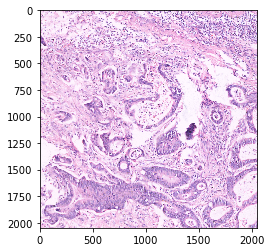

In [52]:
display(img)

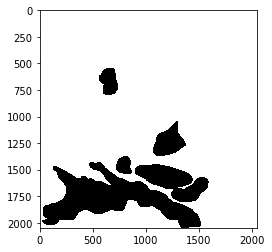

In [53]:
display(label)

In [127]:
p = extract_random_patch_from_contour(img,label,(224,244
                                                 ),10
                                      ,
                                      0.9)

0.999931884749
0.999954058896
0.999956754887
0.999921764982
0.999946690833
0.999932829555
0.999946448175
0.999902419984
0.99920508744
0.996592844974


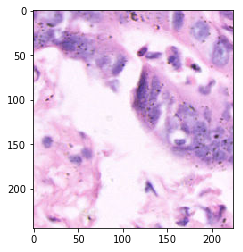

In [131]:
display(p[0])

In [122]:
label[0,0]

0